# Exercise 2.3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [2]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [3]:
import matplotlib
matplotlib.__version__

'3.8.4'

In [14]:
df = pd.read_csv('new_york_citibike_2022_data.csv', index_col = 0)

C:\Users\canam\AppData\Local\Temp\ipykernel_4028\4269700933.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_citibike_2022_data.csv', index_col = 0)


In [15]:
#checking shape of dataframe to make sure 
#it matches what was exported in previous exercise
df.shape

(29838166, 16)

In [16]:
#checking the columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [17]:
#dropping the _merge column
df = df.drop(['_merge'], axis=1)

In [18]:
#checking to see if column was dropped
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [19]:
#checking shape of dataframe
df.shape

(29838166, 15)

In [20]:
#checking data types 
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [21]:
#changing date format to datetime format
df['date'] = pd.to_datetime(df['date'])

In [22]:
#checking to see that it has been changed
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

## Plotting with pandas

In [24]:
#creating dataframe with date as the index
df_temp = df.set_index('date')

In [25]:
#checking to see if date is now the index
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


In [26]:
df_temp = df_temp.sort_index()

<Axes: xlabel='date'>

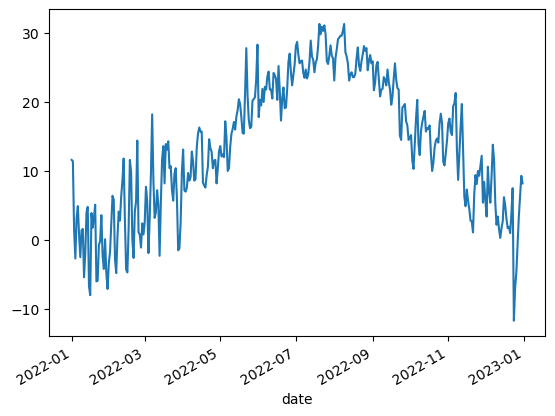

In [27]:
df_temp['avgTemp'].plot()

## Aggregate trips 

In [29]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [30]:
# grouping by the count of the trips
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [31]:
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [32]:
#renaming ride_id column
df_group.rename(columns = {'ride_id':'daily_bike_rides'}, inplace = True)

In [33]:
df_group.head()

,date,daily_bike_rides
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [34]:
#creating a subsample of weather data because it is too large
df_subsample = df.sample(frac=.05)

In [35]:
#merging subsample of weather data with daily_bike_rides_data
df_2 = df_subsample.merge(df_group, on = "date", how = 'outer', indicator = True)
#checking to see if merge was successful
print(df_2['_merge'].value_counts(dropna = False))

_merge
both          1491908
left_only           0
right_only          0
Name: count, dtype: int64


In [36]:
#creating a new dataframe with date as the index
df_temp = df_2.set_index('date')

In [37]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,4358B9E87D6D7A16,classic_bike,2022-01-01 14:54:02.879,2022-01-01 15:03:11.662,35 St & 21 Ave,7170.04,31 St & 21 Ave,7202.07,40.776745,-73.906558,40.778130,-73.908420,member,11.6,20428,both
2022-01-01,38B902A7913496FB,classic_bike,2022-01-01 14:16:55.828,2022-01-01 14:36:57.086,E 32 St & Park Ave,6280.12,Bleecker St & Crosby St,5679.08,40.745712,-73.981948,40.726156,-73.995102,member,11.6,20428,both
2022-01-01,43DD38318BC7164E,classic_bike,2022-01-01 15:02:57.752,2022-01-01 15:05:15.432,Front St & Washington St,4936.01,Cadman Plaza E & Red Cross Pl,4821.06,40.702551,-73.989402,40.699918,-73.989718,member,11.6,20428,both
2022-01-01,A74287183A50FD7B,classic_bike,2022-01-01 06:09:55.182,2022-01-01 06:13:50.673,Bergen Ave & E 152 St,7858.02,Willis Ave & E 141 St,7759.08,40.817166,-73.914737,40.810930,-73.921606,member,11.6,20428,both
2022-01-01,111FDEBA5E422B14,classic_bike,2022-01-01 15:22:00.906,2022-01-01 15:27:44.046,Lexington Ave & E 29 St,6164.09,Lexington Ave & E 29 St,6164.09,40.743116,-73.982154,40.743116,-73.982154,casual,11.6,20428,both


In [38]:
import os

In [39]:
path = r'C:\Users\canam\OneDrive\Desktop\Career Foundry\Specialization\Achievement 2'

In [40]:
df_temp.to_csv(os.path.join(path, 'New_York_Citibike_2022','weather_and_daily_bike_rides_data.csv'))

## Plotting bike trips and temperatures on a dual axis

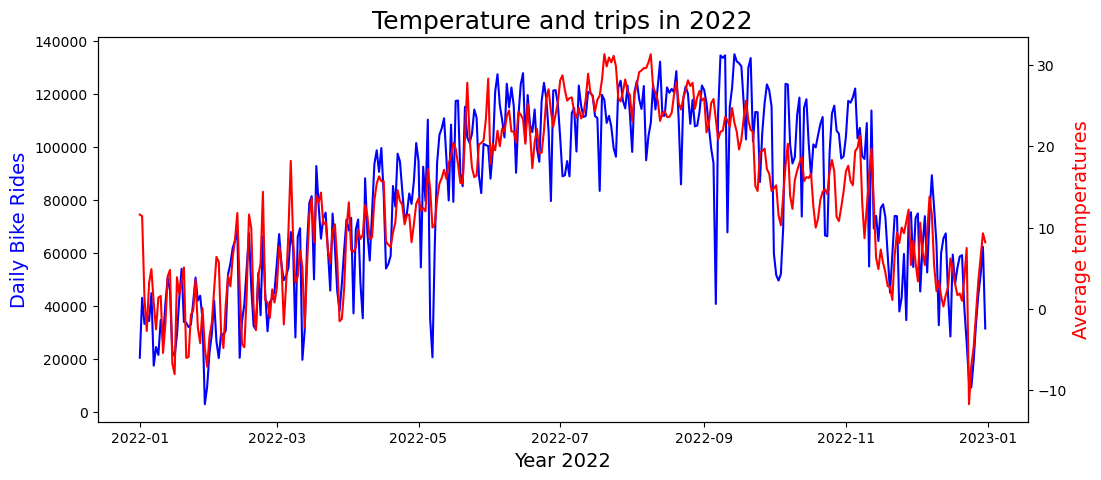

In [42]:
# Creating figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(12, 5))

# Making a plot of the bike rides
ax.plot(df_temp['daily_bike_rides'],color = "blue")
ax.set_xlabel("Year 2022", fontsize = 14) # setting x-axis label
ax.set_ylabel("Daily Bike Rides",color = "blue", fontsize = 14) # setting y-axis label

#creating the dual axis - initializing a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Making a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

I used the object-oriented approach to make this chart.  First, I created the objects fig (figure/container) and ax (axes) as subplots to the chart.  Then I defined the first plot (daily_bike_rides), set the x-axis to "Year 2022", and set the y-axis to "Daily Bike Rides."  The next step was to define the second plot (avgTemp) but because daily_bike_rides and avgTemp have different scales, I needed to first create a twin axis.  This would put avg_Temp on the same chart as the daily_bike_rides but with its own scale on the other y-axis.  After I created the twin axis, I defined the second plot (avgTemp) and all that was left to do was label the other y-axis to "Average Temperatures" and create a title for the chart.         